<a href="https://colab.research.google.com/github/ammarnaq/AAI-Project/blob/main/1Cardio_Train_and_Evaluate_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ookino/datasets/refs/heads/main/cardio_train.csv"

df = pd.read_csv(url, sep=';')

In [ ]:
# Dataset Shape
df.shape

(70000, 13)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['cardio'].value_counts(normalize=True)


,proportion
cardio,
0,0.5003
1,0.4997


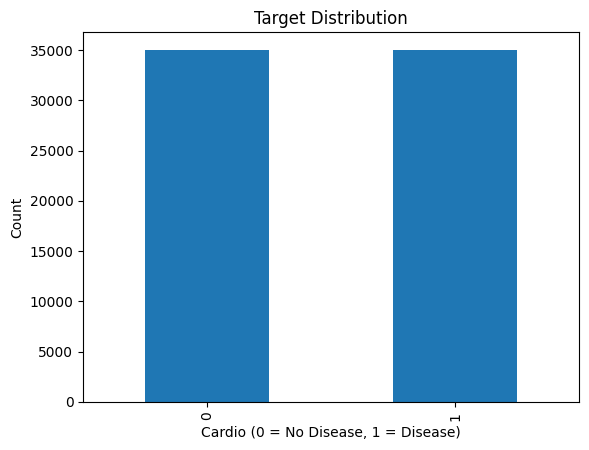

In [ ]:
import matplotlib.pyplot as plt

df['cardio'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Cardio (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()


In [ ]:
# The dataset appears approximately balanced between positive
# and negative classes. This reduces the need for aggressive
# resampling techniques and allows standard evaluation metrics
# such as AUC and F1-score to remain appropriate.

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
#No missing values are observed in the dataset.
#However, absence of missing values does not guarantee
#data validity, and outlier detection remains necessary.

In [ ]:
# Check impossible BP cases
invalid_bp = df[df['ap_lo'] > df['ap_hi']]
invalid_bp.shape

(1234, 13)

In [ ]:
df[['ap_hi', 'ap_lo']].describe()


,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


In [ ]:
df[['height', 'weight']].describe()


,height,weight
count,70000.000000,70000.000000
mean,164.359229,74.205690
std,8.210126,14.395757
min,55.000000,10.000000
25%,159.000000,65.000000
50%,165.000000,72.000000
75%,170.000000,82.000000
max,250.000000,200.000000


In [ ]:
df['age'].describe()


,age
count,70000.000000
mean,19468.865814
std,2467.251667
min,10798.000000
25%,17664.000000
50%,19703.000000
75%,21327.000000
max,23713.000000


In [ ]:
#Cleaning and Preprocessing

In [ ]:
df['age_years'] = df['age'] / 365
df['age_years'].describe()


,age_years
count,70000.000000
mean,53.339358
std,6.759594
min,29.583562
25%,48.394521
50%,53.980822
75%,58.430137
max,64.967123


In [ ]:
initial_rows = df.shape[0]

df = df[
    (df['ap_hi'] >= 60) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 200) &
    (df['ap_hi'] > df['ap_lo'])
]

after_bp_rows = df.shape[0]

print("Rows removed due to BP filtering:", initial_rows - after_bp_rows)
print("Remaining rows:", after_bp_rows)

Rows removed due to BP filtering: 1328
Remaining rows: 68672


In [ ]:
rows_before_hw = df.shape[0]

df = df[
    (df['height'] >= 130) & (df['height'] <= 220) &
    (df['weight'] >= 40) & (df['weight'] <= 250)
]

rows_after_hw = df.shape[0]

print("Rows removed due to height/weight filtering:", rows_before_hw - rows_after_hw)
print("Final dataset size:", rows_after_hw)


Rows removed due to height/weight filtering: 136
Final dataset size: 68536


In [ ]:
#A total of 1,464 records (~2.1% of the dataset) were removed
#due to physiologically implausible values in blood pressure,
#height, or weight measurements.

#The majority of removals resulted from extreme or logically
#inconsistent blood pressure values (e.g., negative values or
#diastolic pressure exceeding systolic pressure).

#The final cleaned dataset contains 68,536 observations,
#representing over 97% of the original data.

In [ ]:
df['cardio'].value_counts(normalize=True)

,proportion
cardio,
0,0.505165
1,0.494835


In [ ]:
#Feature Engineering

In [ ]:
#BMI
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

df['bmi'].describe()


,bmi
count,68536.000000
mean,27.448997
std,5.199539
min,13.520822
25%,23.875115
50%,26.346494
75%,30.116213
max,85.779743


In [ ]:
#Pulse Pressure
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['pulse_pressure'].describe()

,pulse_pressure
count,68536.000000
mean,45.371425
std,11.665198
min,5.000000
25%,40.000000
50%,40.000000
75%,50.000000
max,140.000000


In [ ]:
#Mean Arterial Pressure
df['map'] = df['ap_lo'] + (df['ap_hi'] - df['ap_lo']) / 3
df['map'].describe()

,map
count,68536.000000
mean,96.437746
std,11.052664
min,46.666667
25%,93.333333
50%,93.333333
75%,103.333333
max,186.666667


In [ ]:
#Lifestyle Risk Score
df['risk_factor_count'] = (
    df['smoke'] +
    df['alco'] +
    (1 - df['active'])
)

df['risk_factor_count'].value_counts()


,count
risk_factor_count,
0,48461
1,17260
2,2538
3,277


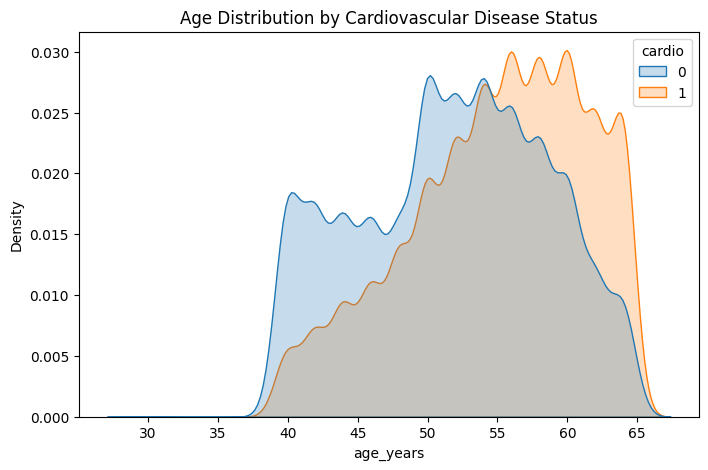

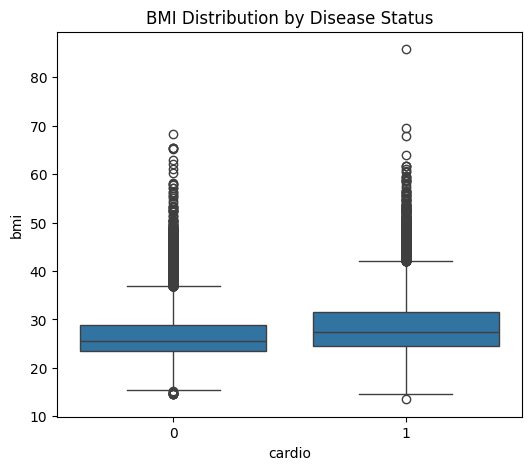

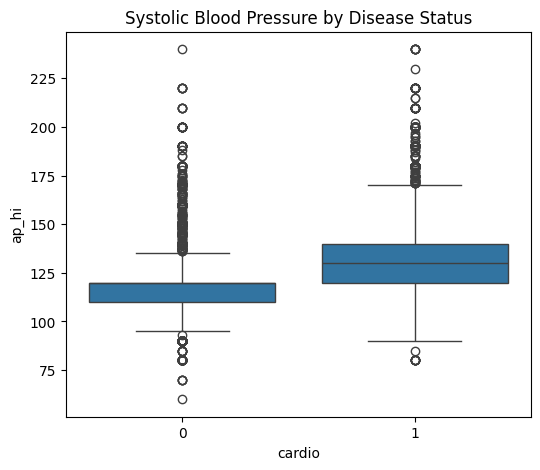

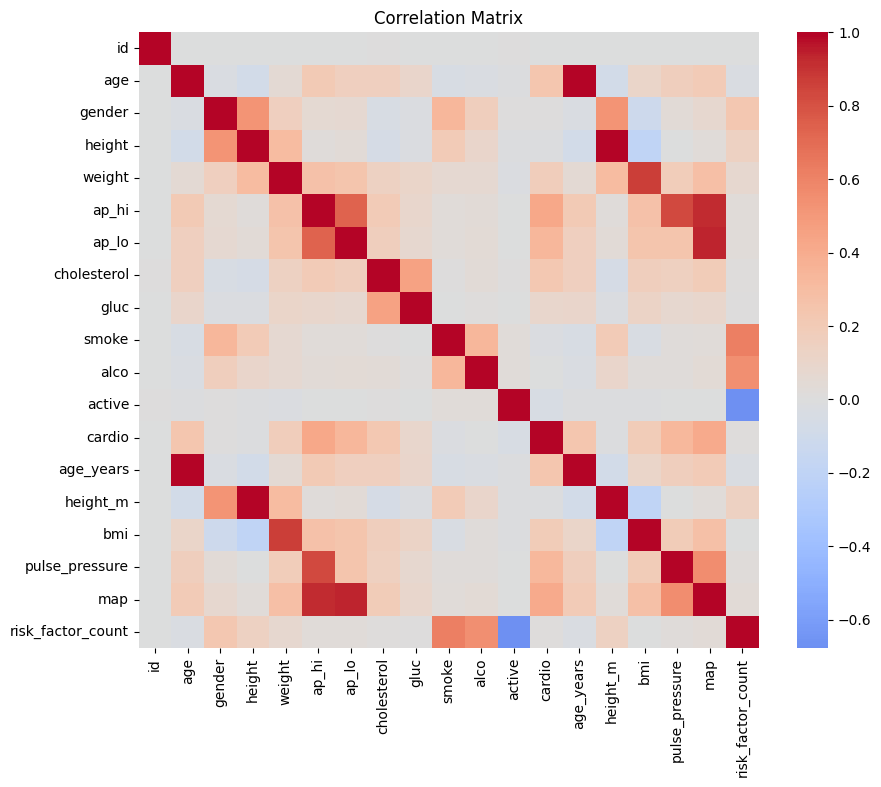

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='age_years', hue='cardio', fill=True)
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='cardio', y='bmi')
plt.title('BMI Distribution by Disease Status')
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='cardio', y='ap_hi')
plt.title('Systolic Blood Pressure by Disease Status')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Age distribution demonstrates a clear rightward shift for individuals
#with cardiovascular disease, indicating increased prevalence in older
#age groups.
#Although the distributions overlap considerably, the separation
#suggests age is a meaningful predictor and likely contributes
#strongly to model discrimination.


#BMI shows a modest upward shift among individuals with cardiovascular
#disease. While overlap between classes is substantial, the central
#tendency difference supports BMI as a contributory, though not
#independently decisive, risk factor.

#Systolic blood pressure demonstrates a pronounced shift toward
#higher values in the disease group, with both median and upper
#quartile substantially elevated.
#This suggests blood pressure variables are likely to be among
#the strongest predictors in subsequent modelling.



In [ ]:
#The correlation matrix reveals several expected structural relationships
#within the dataset. Systolic and diastolic blood pressure are strongly
#positively correlated, reflecting physiological coupling. Derived variables
#such as pulse pressure and mean arterial pressure also demonstrate high
#correlation with systolic blood pressure, as anticipated given their
#formulation.

#BMI exhibits moderate correlation with weight, which is expected due to
#its dependence on both height and weight. Additionally, the composite
#risk factor count correlates strongly with smoking and alcohol variables,
#consistent with its construction.

#The observed correlations suggest that some predictors share similar
#information, particularly among blood pressure variables and their
#derived measures. Although tree-based models can handle correlated
#features effectively, linear models such as Logistic Regression may
#be sensitive to this overlap.

In [ ]:
df.drop(columns=['id', 'age', 'height_m'], inplace=True, errors='ignore')


In [ ]:
df.columns


Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'pulse_pressure', 'map', 'risk_factor_count'],
      dtype='object')

In [ ]:
#Stratified Train/Test Split

In [ ]:
X = df.drop(columns=['cardio'])
y = df['cardio']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 54828
Test set size: 13708


In [ ]:
numerical_features = [
    'age_years', 'height', 'weight',
    'ap_hi', 'ap_lo', 'bmi',
    'pulse_pressure', 'map'
]

categorical_features = [
    'gender', 'cholesterol', 'gluc',
    'smoke', 'alco', 'active',
    'risk_factor_count'
]

In [ ]:

#Preprocessing Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)
    ]
)



In [ ]:
#Evaluation Strate

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision'
}


In [ ]:
#Logistic Regression Baseline
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg_cv = cross_validate(
    log_reg_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

log_reg_results = {
    metric: log_reg_cv[f'test_{metric}'].mean()
    for metric in scoring
}

log_reg_results

{'auc': np.float64(0.7919137653045564),
 'f1': np.float64(0.7088708525669883),
 'recall': np.float64(0.6687920651211459),
 'precision': np.float64(0.7541352512204703)}

In [ ]:
#Random Forest Baseline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

rf_cv = cross_validate(
    rf_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

rf_results = {
    metric: rf_cv[f'test_{metric}'].mean()
    for metric in scoring
}

rf_results


{'auc': np.float64(0.7706826797819609),
 'f1': np.float64(0.7023090450333392),
 'recall': np.float64(0.6928604713663937),
 'precision': np.float64(0.7121135535729096)}

In [ ]:
#XG Boost Baseline
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        use_label_encoder=False
    ))
])

xgb_cv = cross_validate(
    xgb_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

xgb_results = {
    metric: xgb_cv[f'test_{metric}'].mean()
    for metric in scoring
}

xgb_results


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:39:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:39:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:39:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:39:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:39:07] WARNING: /w

{'auc': np.float64(0.7934686614519416),
 'f1': np.float64(0.7175900486391896),
 'recall': np.float64(0.6893220006641105),
 'precision': np.float64(0.7483898413549486)}

In [ ]:
#Baseline evaluation reveals comparable discrimination performance
#between Logistic Regression (AUC = 0.792) and XGBoost (AUC = 0.793),
#while Random Forest performs slightly lower (AUC = 0.771).

#The marginal performance gain from boosting relative to the linear
#baseline suggests that much of the predictive signal may be captured
#through linear relationships, with limited additional benefit from
#complex nonlinear modelling under default hyperparameters.

#Logistic Regression
#AUC: 79.19%
#F1-score: 70.89%
#Recall: 66.88%
#Precision: 75.41%

#Random Forest
#AUC: 77.07%
#F1-score: 70.23%
#Recall: 69.29%
#Precision: 71.21%

#XGBoost
#AUC: 79.35%
#F1-score: 71.76%
#Recall: 68.93%
#Precision: 74.84%


In [ ]:
#Hyper Parameter tunnig

In [ ]:
#XGBoost Optimisation
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

param_dist = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age_years',
                                                                                'height',
                                                                                'weight',
                                                                                'ap_hi',
                                                                                'ap_lo',
                                                                                'bmi',
                                                                                'pulse_pressure',
                                                                                'map']),
                                                                              ('cat',
                                                                               'passthrough',
                                                                               ['gender',
                                                                                'cholesterol',
                                                                                'gluc',
                                                                                'smoke',
                                                                                'alco',
                                                                                'active',
                                                                                'risk_factor_count'...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.7, 0.8,
                                                                    0.9],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7],
                                        'model__n_estimators': [200, 300, 400],
                                        'model__subsample': [0.7, 0.8, 0.9]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
xgb_search.best_params_

{'model__subsample': 0.7,
 'model__n_estimators': 400,
 'model__max_depth': 5,
 'model__learning_rate': 0.01,
 'model__colsample_bytree': 0.7}

In [ ]:
xgb_search.best_score_

np.float64(0.8017511993686606)

In [ ]:
#Evaluate tuned model via cros validation
best_xgb = xgb_search.best_estimator_

xgb_tuned_cv = cross_validate(
    best_xgb,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

xgb_tuned_results = {
    metric: xgb_tuned_cv[f'test_{metric}'].mean()
    for metric in scoring
}

xgb_tuned_results


{'auc': np.float64(0.8017511993686606),
 'f1': np.float64(0.7191952731079734),
 'recall': np.float64(0.6833142039865517),
 'precision': np.float64(0.759133093538312)}

In [ ]:
#Hyperparameter optimisation resulted in a modest but consistent
#improvement in discrimination performance (AUC increased from
#0.793 to 0.802). The optimal configuration favoured a lower
#learning rate with moderate tree depth and subsampling, suggesting
#benefit from stronger regularisation.

#The performance gain, while statistically meaningful, was not
#substantial, indicating that baseline model configuration was
#already capturing much of the available signal.


In [ ]:
#Logistic Regression Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    max_iter=2000,
    solver='liblinear'
)

log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', log_reg_model)
])

param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}


In [ ]:
log_reg_search = GridSearchCV(
    log_reg_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

log_reg_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age_years',
                                                                          'height',
                                                                          'weight',
                                                                          'ap_hi',
                                                                          'ap_lo',
                                                                          'bmi',
                                                                          'pulse_pressure',
                                                                          'map']),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         ['gender',
                                                                          'cholesterol',
                                                                          'gluc',
                                                                          'smoke',
                                                                          'alco',
                                                                          'active',
                                                                          'risk_factor_count'])])),
                                       ('model',
                                        LogisticRegression(max_iter=2000,
                                                           solver='liblinear'))]),
             n_jobs=-1, param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [ ]:
log_reg_search.best_params_

{'model__C': 0.01}

In [ ]:
log_reg_search.best_score_

np.float64(0.7919693044177375)

In [ ]:
best_log_reg = log_reg_search.best_estimator_

log_reg_tuned_cv = cross_validate(
    best_log_reg,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

log_reg_tuned_results = {
    metric: log_reg_tuned_cv[f'test_{metric}'].mean()
    for metric in scoring
}

log_reg_tuned_results


{'auc': np.float64(0.7919693044177375),
 'f1': np.float64(0.7088221988167561),
 'recall': np.float64(0.6687183663666894),
 'precision': np.float64(0.7541217411115185)}

In [ ]:
#Logistic Regression exhibited stable performance under regularisation
#(C = 0.01), with negligible improvement over baseline.
#Although XGBoost achieved higher discrimination performance
#(AUC = 0.802 vs 0.792), the margin of improvement was modest
#(approximately 1 percentage point), suggesting that much of the
#predictive structure in the dataset may be captured through
#approximately linear relationships.


In [ ]:
#XGBost will be used since it has a higer AUC score, slightly better f1

In [ ]:
#Test Evaluation
best_xgb.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age_years', 'height',
                                                   'weight', 'ap_hi', 'ap_lo',
                                                   'bmi', 'pulse_pressure',
                                                   'map']),
                                                 ('cat', 'passthrough',
                                                  ['gender', 'cholesterol',
                                                   'gluc', 'smoke', 'alco',
                                                   'active',
                                                   'risk_factor_count'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_test_pred = best_xgb.predict(X_test)
y_test_proba = best_xgb.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
    accuracy_score
)

test_results = {
    "AUC": roc_auc_score(y_test, y_test_proba),
    "F1": f1_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Accuracy": accuracy_score(y_test, y_test_pred)
}

test_results


{'AUC': np.float64(0.8010653305593567),
 'F1': 0.7157665030005456,
 'Recall': 0.6769865841073271,
 'Precision': 0.7592592592592593,
 'Accuracy': 0.7339509775313685}

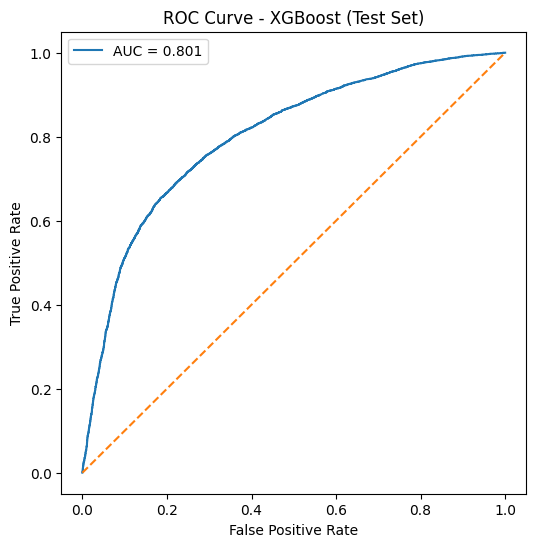

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {test_results['AUC']:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Test Set)")
plt.legend()
plt.show()


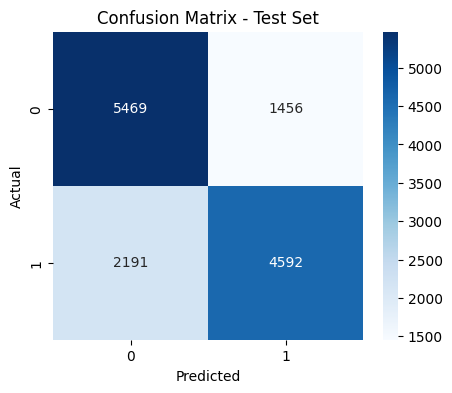

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()


In [ ]:
#he tuned XGBoost model achieved an AUC of 0.801 on the holdout
#test set, closely matching cross-validation performance (0.802),
#indicating minimal overfitting and strong generalisation.

#However,  the confusion matrix at the default
#decision threshold of 0.5 reveals that approximately one-third
#of true positive cases (2,191 patients) are misclassified as
#negative, corresponding to a recall of 0.677.

#While precision remains relatively high (0.759), the observed
#false negative rate may be clinically undesirable in a screening
#context. Although the ROC curve demonstrates strong overall
#discrimination, the default decision boundary may not be optimal
#for maximising sensitivity.

#This motivates a structured threshold optimisation analysis to
#explore recall–precision trade-offs and assess clinical utility.


In [ ]:
#Threshold optimization

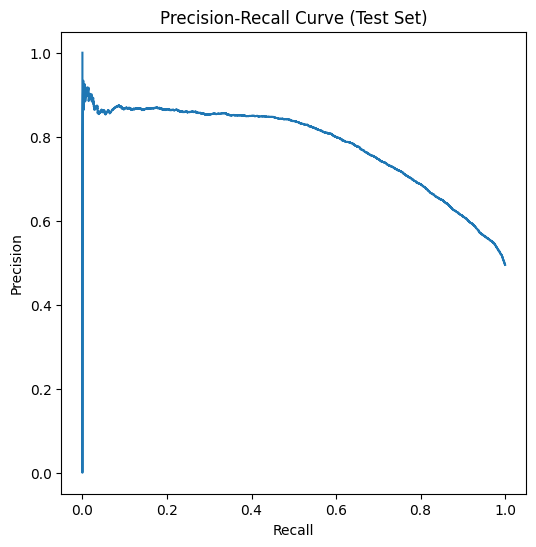

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Test Set)")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

threshold_range = np.arange(0.1, 0.9, 0.05)

threshold_results = []

for thresh in threshold_range:
    y_pred_thresh = (y_test_proba >= thresh).astype(int)

    threshold_results.append({
        "threshold": thresh,
        "recall": recall_score(y_test, y_pred_thresh),
        "precision": precision_score(y_test, y_pred_thresh),
        "f1": f1_score(y_test, y_pred_thresh)
    })

threshold_df = pd.DataFrame(threshold_results)
threshold_df


,threshold,recall,precision,f1
0,0.10,0.997641,0.501148,0.667160
1,0.15,0.989238,0.521044,0.682570
2,0.20,0.971989,0.548229,0.701047
3,0.25,0.933805,0.580356,0.715828
4,0.30,0.880879,0.623891,0.730440
5,0.35,0.834144,0.658750,0.736144
6,0.40,0.776500,0.701986,0.737365
7,0.45,0.725785,0.731175,0.728470
8,0.50,0.676987,0.759259,0.715767
9,0.55,0.625534,0.787637,0.697288


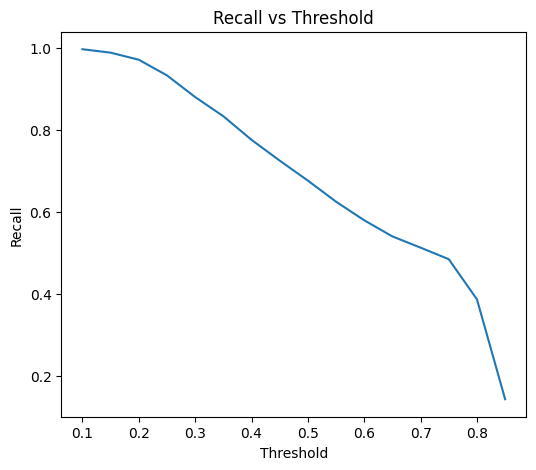

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(threshold_df["threshold"], threshold_df["recall"])
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold")
plt.show()


In [ ]:
threshold_df[threshold_df["recall"] >= 0.80].head()


,threshold,recall,precision,f1
0,0.10,0.997641,0.501148,0.667160
1,0.15,0.989238,0.521044,0.682570
2,0.20,0.971989,0.548229,0.701047
3,0.25,0.933805,0.580356,0.715828
4,0.30,0.880879,0.623891,0.730440


In [ ]:
#Evaluation at Threshold = 0.30

In [ ]:
threshold_selected = 0.30

y_test_pred_030 = (y_test_proba >= threshold_selected).astype(int)


In [ ]:
test_results_030 = {
    "AUC": roc_auc_score(y_test, y_test_proba),  # unchanged
    "F1": f1_score(y_test, y_test_pred_030),
    "Recall": recall_score(y_test, y_test_pred_030),
    "Precision": precision_score(y_test, y_test_pred_030),
    "Accuracy": accuracy_score(y_test, y_test_pred_030)
}

test_results_030


{'AUC': np.float64(0.8010653305593567),
 'F1': 0.730440097799511,
 'Recall': 0.8808786672563762,
 'Precision': 0.623890571160071,
 'Accuracy': 0.6782900496060694}

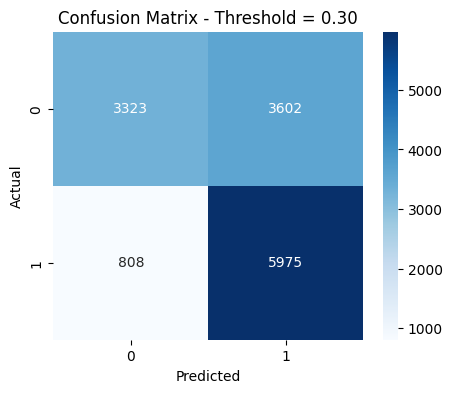

In [ ]:
cm_030 = confusion_matrix(y_test, y_test_pred_030)

plt.figure(figsize=(5,4))
sns.heatmap(cm_030, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Threshold = 0.30")
plt.show()


In [ ]:
#Lowering the decision threshold from 0.5 to 0.30 increased recall
#from 0.677 to 0.881, reducing false negatives from 2,191 to 808
#patients.

#Although precision decreased from 0.759 to 0.624, the substantial
#reduction in missed positive cases may be preferable in a screening
##context where sensitivity is prioritised.

#Notably, AUC remained unchanged, reflecting that discrimination
#capacity is independent of threshold selection. These findings
#demonstrate the importance of aligning decision thresholds with
#clinical objectives rather than relying solely on default settings.


In [ ]:
#Ablation Study

In [ ]:
# def evaluate_subset(features_to_keep):

#     X_train_sub = X_train[features_to_keep]
#     X_test_sub = X_test[features_to_keep]

#     # new preprocessor based only on subset
#     numerical_sub = [f for f in numerical_features if f in features_to_keep]
#     categorical_sub = [f for f in categorical_features if f in features_to_keep]

#     preprocessor_sub = ColumnTransformer(
#         transformers=[
#             ('num', StandardScaler(), numerical_sub),
#             ('cat', 'passthrough', categorical_sub)
#         ]
#     )

#     model_sub = Pipeline([
#         ('preprocessor', preprocessor_sub),
#         ('model', XGBClassifier(
#             eval_metric='logloss',
#             random_state=42,
#             **xgb_search.best_params_
#         ))
#     ])

#     model_sub.fit(X_train_sub, y_train)
#     y_proba_sub = model_sub.predict_proba(X_test_sub)[:, 1]

#     auc_sub = roc_auc_score(y_test, y_proba_sub)

#     return auc_sub


best_params_clean = {
    key.replace("model__", ""): value
    for key, value in xgb_search.best_params_.items()
}

def evaluate_subset(features_to_keep):

    X_train_sub = X_train[features_to_keep]
    X_test_sub = X_test[features_to_keep]

    numerical_sub = [f for f in numerical_features if f in features_to_keep]
    categorical_sub = [f for f in categorical_features if f in features_to_keep]

    preprocessor_sub = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_sub),
            ('cat', 'passthrough', categorical_sub)
        ]
    )

    model_sub = Pipeline([
        ('preprocessor', preprocessor_sub),
        ('model', XGBClassifier(
            eval_metric='logloss',
            random_state=42,
            **best_params_clean
        ))
    ])

    model_sub.fit(X_train_sub, y_train)
    y_proba_sub = model_sub.predict_proba(X_test_sub)[:, 1]

    return roc_auc_score(y_test, y_proba_sub)



In [ ]:
#Remove lifestyle variables
features_no_lifestyle = [
    col for col in X.columns
    if col not in ['smoke', 'alco', 'active']
]

auc_no_lifestyle = evaluate_subset(features_no_lifestyle)
auc_no_lifestyle

np.float64(0.8003301522014848)

In [ ]:
#Remove Blood Pressure Variables
features_no_bp = [
    col for col in X.columns
    if col not in ['ap_hi', 'ap_lo', 'pulse_pressure', 'map']
]

auc_no_bp = evaluate_subset(features_no_bp)
auc_no_bp

np.float64(0.7011620471863456)

In [ ]:
#Remove BMI
features_no_bmi = [
    col for col in X.columns
    if col != 'bmi'
]

auc_no_bmi = evaluate_subset(features_no_bmi)
auc_no_bmi

np.float64(0.8010149817099554)

In [ ]:
features_no_age = [
    col for col in X.columns
    if col != 'age_years'
]

auc_no_age = evaluate_subset(features_no_age)
auc_no_age


np.float64(0.778809095365298)

In [ ]:
# Remove engineered BP
features_no_engineered_bp = [
    col for col in X.columns
    if col not in ['pulse_pressure', 'map']
]

auc_no_engineered_bp = evaluate_subset(features_no_engineered_bp)
auc_no_engineered_bp


np.float64(0.8013418447371349)

In [ ]:
# Ablation analysis demonstrates that blood pressure variables
# (ap_hi and ap_lo) are the dominant drivers of model discrimination.
# Removal of blood pressure-related features resulted in a substantial
# decrease in AUC from 0.801 to 0.701, indicating strong
# dependence on haemodynamic indicators.

# Age contributed moderate predictive value, with removal leading
# to a reduction in AUC to 0.779 (ΔAUC = −0.022). The relatively
# smaller performance degradation suggests partial redundancy between
# age and blood pressure, consistent with the known association
# between ageing and elevated cardiovascular risk.

# In contrast, removal of lifestyle variables (smoking, alcohol
# consumption, and physical activity) and BMI resulted in negligible
# changes in performance (ΔAUC ≈ 0.000–0.001), indicating limited
# incremental predictive contribution beyond primary clinical features.

# Notably, exclusion of engineered haemodynamic features (pulse
# pressure and mean arterial pressure) did not materially affect
# performance, suggesting that the model was able to internally
# capture nonlinear relationships between systolic and diastolic
# blood pressure without requiring explicit feature construction.

# Overall, the model’s discriminative capacity appears to be driven
# primarily by raw blood pressure measurements, with age providing
# secondary contribution and other variables offering minimal
# incremental value within this dataset.



In [ ]:
!pip install shap

In [ ]:
import shap


In [ ]:
# Extract trained XGBoost model from pipeline
xgb_model_fitted = best_xgb.named_steps['model']

# Transform test data using preprocessor
X_test_transformed = best_xgb.named_steps['preprocessor'].transform(X_test)


In [ ]:
explainer = shap.TreeExplainer(xgb_model_fitted)
shap_values = explainer.shap_values(X_test_transformed)


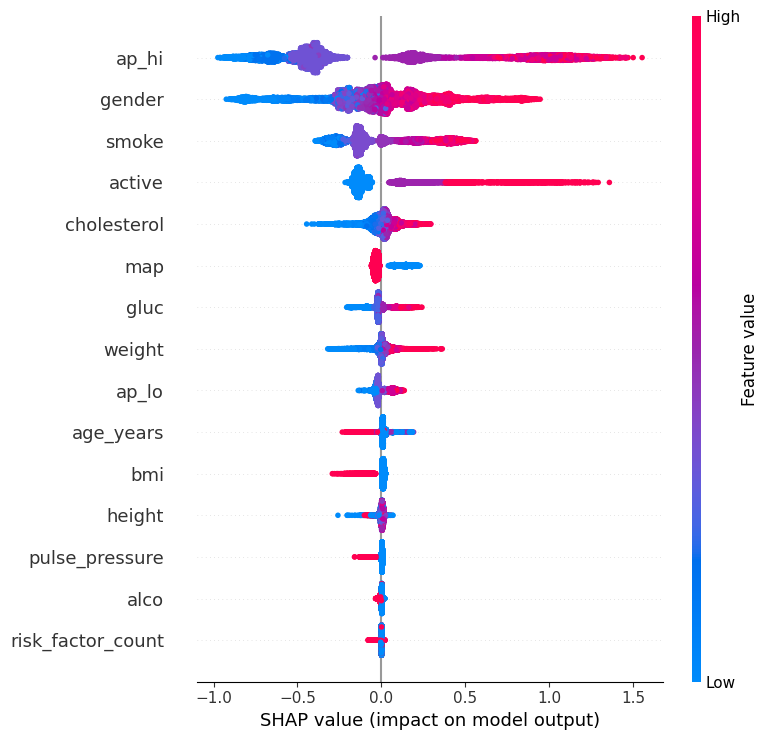

In [ ]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=X.columns
)


In [ ]:
shap.initjs()

shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    feature_names=X.columns
)


In [ ]:
# SHAP analysis was conducted to examine feature-level contributions
# to model predictions and assess alignment with ablation findings.

# The global SHAP summary plot indicates that systolic blood pressure
# (ap_hi) is the most influential predictor, confirming its dominant
# role identified during ablation analysis. Gender and lifestyle
# variables (smoking and physical activity) also demonstrate substantial
# contribution to individual predictions, although prior ablation
# experiments revealed that removal of lifestyle variables resulted
# in negligible performance degradation. This suggests that while
# these features influence local predictions, they do not provide
# essential discriminative capacity at the population level.

# Age contributes moderate influence, ranking below primary
# haemodynamic indicators, which is consistent with the modest
# performance drop observed when age was removed. Engineered
# haemodynamic features (pulse pressure and mean arterial pressure)
# exhibit comparatively lower importance, reinforcing earlier findings
# that the model effectively captures nonlinear relationships between
# systolic and diastolic pressure without requiring explicit
# feature construction.

# Overall, SHAP results demonstrate strong alignment with empirical
# ablation findings, indicating that model discrimination is driven
# primarily by raw blood pressure measurements, with demographic
# and metabolic features providing secondary contributions.


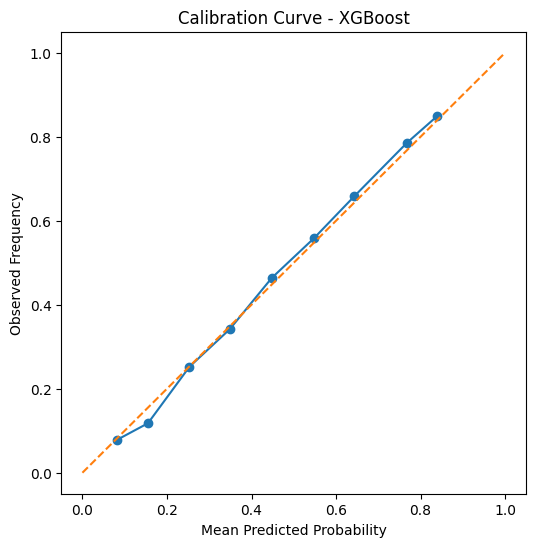

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities on test set
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot
plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')  # Perfect calibration line
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Curve - XGBoost")
plt.show()


In [ ]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(y_test, y_prob)
brier


np.float64(0.18061964520591817)

In [ ]:
# Calibration analysis shows that predicted probabilities closely
# match observed outcome frequencies. The calibration curve follows
# the diagonal reference line, indicating that the model is neither
# systematically overconfident nor underconfident across probability
# ranges.

# The Brier score of 0.181 further indicates acceptable probability
# accuracy, performing substantially better than the random baseline
# of 0.25 for a balanced binary outcome.

# Combined with strong discrimination (AUC ≈ 0.80), these results
# suggest that the model not only distinguishes high- and low-risk
# patients effectively but also provides reasonably reliable
# probability estimates for risk stratification.

In [ ]:
#Extra Playground

In [ ]:
import pandas as pd


url = "https://raw.githubusercontent.com/ookino/datasets/refs/heads/main/framingham_heart_study.csv"
df_framingham = pd.read_csv(url)

df_framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df_framingham.info()
df_framingham.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df_framingham.isnull().sum()


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df_framingham = df_framingham.dropna()


In [ ]:
X_f = df_framingham.drop(columns=["TenYearCHD"])
y_f = df_framingham["TenYearCHD"]


In [ ]:
y_f.value_counts(normalize=True)


,proportion
TenYearCHD,
0,0.847731
1,0.152269


In [ ]:
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_f,
    y_f,
    test_size=0.2,
    stratify=y_f,
    random_state=42
)


In [ ]:
numerical_f = [
    'age', 'cigsPerDay', 'totChol', 'sysBP',
    'diaBP', 'BMI', 'heartRate', 'glucose'
]

categorical_f = [
    'male', 'currentSmoker', 'BPMeds',
    'prevalentStroke', 'prevalentHyp', 'diabetes'
]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessor_f = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_f),
        ('cat', 'passthrough', categorical_f)
    ]
)


In [ ]:
from xgboost import XGBClassifier

xgb_f = Pipeline([
    ('preprocessor', preprocessor_f),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_f.fit(X_train_f, y_train_f)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'cigsPerDay',
                                                   'totChol', 'sysBP', 'diaBP',
                                                   'BMI', 'heartRate',
                                                   'glucose']),
                                                 ('cat', 'passthrough',
                                                  ['male', 'currentSmoker',
                                                   'BPMeds', 'prevalentStroke',
                                                   'prevalentHyp',
                                                   'diabetes'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob_f = xgb_f.predict_proba(X_test_f)[:, 1]
auc_f = roc_auc_score(y_test_f, y_prob_f)

auc_f


np.float64(0.6483875179527352)

In [ ]:
XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight = (len(y_train_f) - sum(y_train_f)) / sum(y_train_f)
)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)